In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [2]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [3]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
df.info

<bound method DataFrame.info of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1        

In [5]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)  # Drop rows with missing values
df['horsepower'] = pd.to_numeric(df['horsepower'])


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
x = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']]
x
y = df['mpg']
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred=model.predict(x_test)
y_pred

array([25.84156153, 26.03674454, 34.50601837, 24.89553187, 28.42598707,
       30.56138237,  8.58694262, 30.7218562 , 20.55678574, 28.64682346,
       12.61214902, 25.2643465 , 16.77369622, 29.68019379, 21.82299683,
       29.24834035, 20.39502626, 33.38385417, 26.67772934, 29.95149498,
       18.93820309, 34.50905163, 35.48745148, 14.89405823, 28.45593435,
       25.63054631, 21.02578033, 16.17903858, 28.69605142, 24.09256378,
       13.39025838, 23.44947094, 20.79944762, 31.89302231, 12.28040099,
       36.22266955, 10.8636647 , 24.36542068, 11.44089858,  7.13672588,
       12.8573181 , 27.56118055, 34.72959156, 26.38589426, 11.98975421,
        9.7978054 , 17.6085252 , 31.37733687, 24.35162554, 30.20405732,
       11.90151257, 26.51654159, 23.12231154, 35.1356023 , 28.26003717,
       17.78388638, 20.273919  , 22.70560675, 22.71178336, 25.99895526,
        8.48482756, 22.69686893, 25.76229967, 23.34794704, 29.95814981,
       28.72694968, 25.73473703, 29.42872474, 21.73843531, 10.07

In [15]:
y_test

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
       ... 
366    17.6
83     28.0
115    15.0
3      16.0
18     27.0
Name: mpg, Length: 79, dtype: float64

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.790150038676035

In [17]:
model.predict([[17,32,75,78,34,65,87]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([165.59336233])

In [23]:
import matplotlib.pyplot as plt


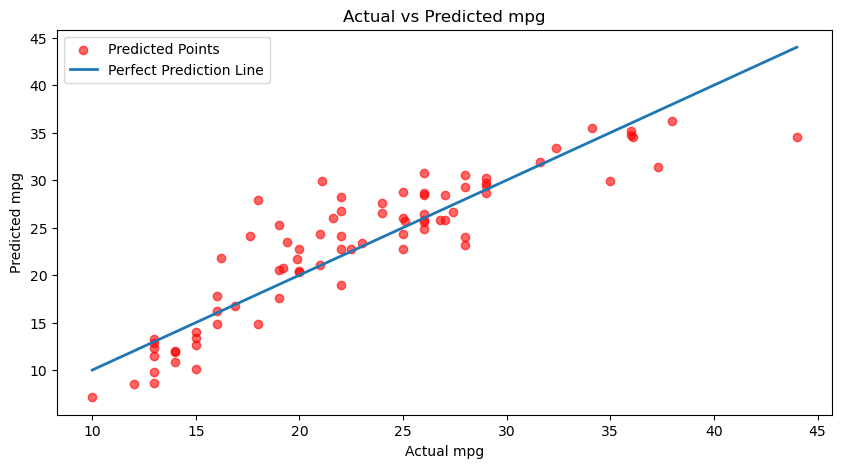

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred, alpha=0.6, color="red", label="Predicted Points")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linewidth=2, label="Perfect Prediction Line")
plt.title("Actual vs Predicted mpg")
plt.xlabel("Actual mpg")
plt.ylabel("Predicted mpg")
plt.legend()
plt.show()